<a href="https://colab.research.google.com/github/phk16/jupyterNotebooks/blob/main/Abalone_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from numpy import isnan
import warnings
from scipy.stats import skew

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
%matplotlib inline
warnings.filterwarnings('ignore')


print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.5.3
numpy version: 1.23.5
seaborn version: 0.12.2


In [2]:
df=pd.read_csv('1_abalone.csv', na_values='NAN')

In [3]:

sns.set_style("white")
sns.set(rc={"axes.facecolor":"#05f28f", "figure.facecolor":"#c5f0de",
            "axes.grid":True, "grid.color":"black", "axes.edgecolor":"black",
            "grid.linestyle": u"-", "axes.labelcolor": "black", "font.family": [u"DejaVu Sans"],
            "text.color": "black", "xtick.color": "black", "ytick.color": "black",
            "legend.facecolor":"#65cee8", "legend.frameon": True, "legend.edgecolor":"#27a1bf"})
sns.set_context("poster",font_scale = 0.7)

palette = ["#003049","#d62828","#f77f00","#fcbf49","#eae2b7", "#f27a02","#97f7f6","#150647"]
palette_cmap = ["#272716","#6c2411","#cc3f18","#db6400","#ae0d13"]

In [4]:
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': 'background-color: #f0f099; color: black'
#     'props': [('background-color', '#ffffb3'; 'color')].
}
index_names = {
    'selector': '.index_name',
    'props': 'font-style: italic; color: black; font-weight:normal;'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #c5f0de; color: black;'
}

table_styles = [cell_hover, index_names, headers]
set_properties = {"background-color": "#05f28f","color":"black","border": "1.3px solid black"}

styles = df.head(10).style.set_table_styles(table_styles).set_properties(**set_properties).highlight_null(null_color="#c600de").set_caption("10 sample records from the dataset.")
styles

In [5]:
print("\033[1m Some basic information about the dataset.\033[0m\n")

df.info()

 Some basic information about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole_wt    4177 non-null   float64
 5   shucked_wt  4177 non-null   float64
 6   viscera_wt  4177 non-null   float64
 7   shell_wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
 9   age         4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


<div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#023e8a;padding:20px;border-radius:10px;border:3px solid #000066;color:white">
    👀 &nbsp;<b>Inference</b><br />

   - <i>Let's understand what each columns are before doing EDA</i>
   - <i>Abalone is a shell fish</i><br />
</div>

In [6]:
print('This dataset has {} observations with {} features.\n'.format(df.shape[0], df.shape[1]))

df['Gender'].unique()

This dataset has 4177 observations with 10 features.



array(['M', 'F', 'I'], dtype=object)


  <div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#023e8a;padding:20px;border-radius:10px;border:3px solid #000066;color:white">
    👀 &nbsp;<b>Inference</b><br />
   <i><b>Attributes</b></i><br/>
   -> <i>Gender - Male(M) or Female(F) or Imature(I)</i><br/>
   -> <i>Length (mm) - longest shell measurement</i><br/>
   -> <i>Diam (mm) - shell measurement perpendicular to length</i><br/>
   -> <i>Height (mm) -	height of abalone (including body)</i><br/>
   -> <i>Whole (g) -	weight of whole abalone</i><br/>
   -> <i>Shucked	(g) -	weight of meat</i><br/>
   -> <i>Viscera	(g) -	gut weight(after bleeding)</i><br/>
   -> <i>Shell	(g) -	shell weight after drying</i><br/>
   -> <i>Rings	-	number of rings in the shell<br />
</div>

In [7]:
df_outlier = df.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.9]).transpose()

df_outlier['skew']=df.skew(numeric_only=True)

df_outlier.style.set_table_styles(table_styles).set_properties(**set_properties)\
.set_caption("Some basic statistical values of the dataset.")

CPU times: user 83.3 ms, sys: 730 µs, total: 84 ms
Wall time: 118 ms


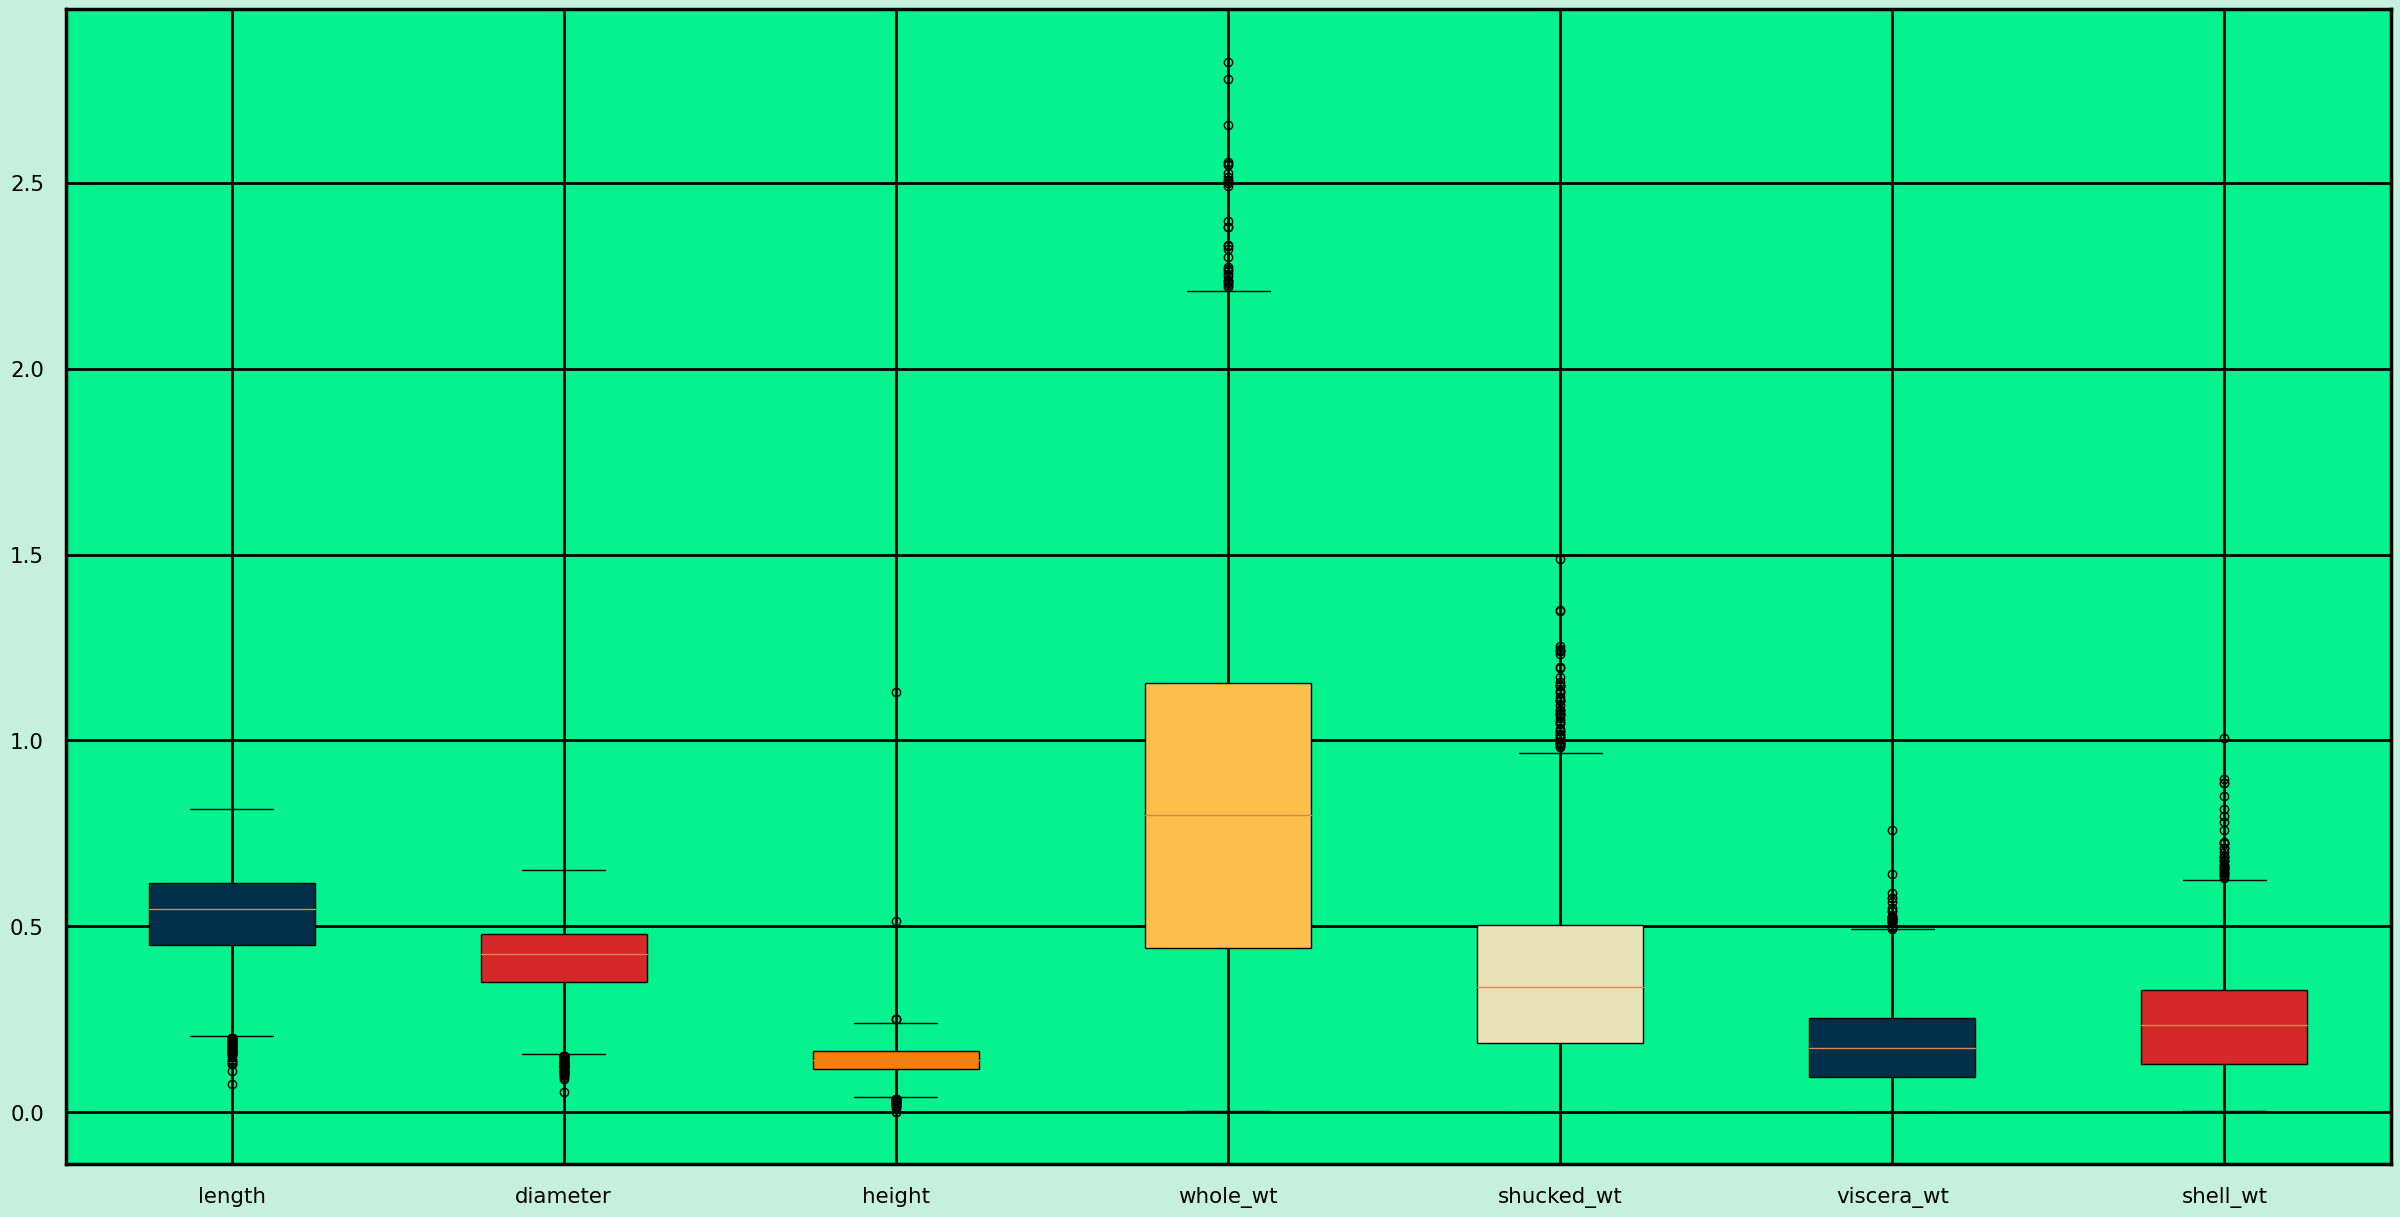

In [8]:
%%time
df_plot = df[['length', 'diameter', 'height', 'whole_wt', 'shucked_wt', 'viscera_wt', 'shell_wt']]
x_values = ['length', 'diameter', 'height', 'whole_wt', 'shucked_wt', 'viscera_wt', 'shell_wt']

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(30, 15))

#fig = plt.figure(figsize=(40,40))
bplot=ax1.boxplot(df_plot,patch_artist=True, labels=x_values)

colors = ["#003049","#d62828","#f77f00","#fcbf49","#eae2b7"]*9

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

In [9]:
def high_corr(val):
    val = val.tolist()
    return ['background-color:green;color:white' if abs(i) > 0.6 else 'background-color:#c600de;color:white' if (abs(i) > 0.5 and abs(i) < 0.6) else 'background-color:#023e8a;color:white' for i in val]


df_corr=pd.DataFrame(df.corr()['age'].sort_values(ascending=False))
high_corr_columns = df_corr[(df_corr>0.5) | (df_corr<-0.5)].notnull().sum()

df_corr.T.style.set_table_styles(table_styles).set_properties(**set_properties)\
.highlight_null(null_color="#c600de").apply(high_corr)\
.set_caption(f'number of columns with high Correaltion is: {high_corr_columns[0]}')

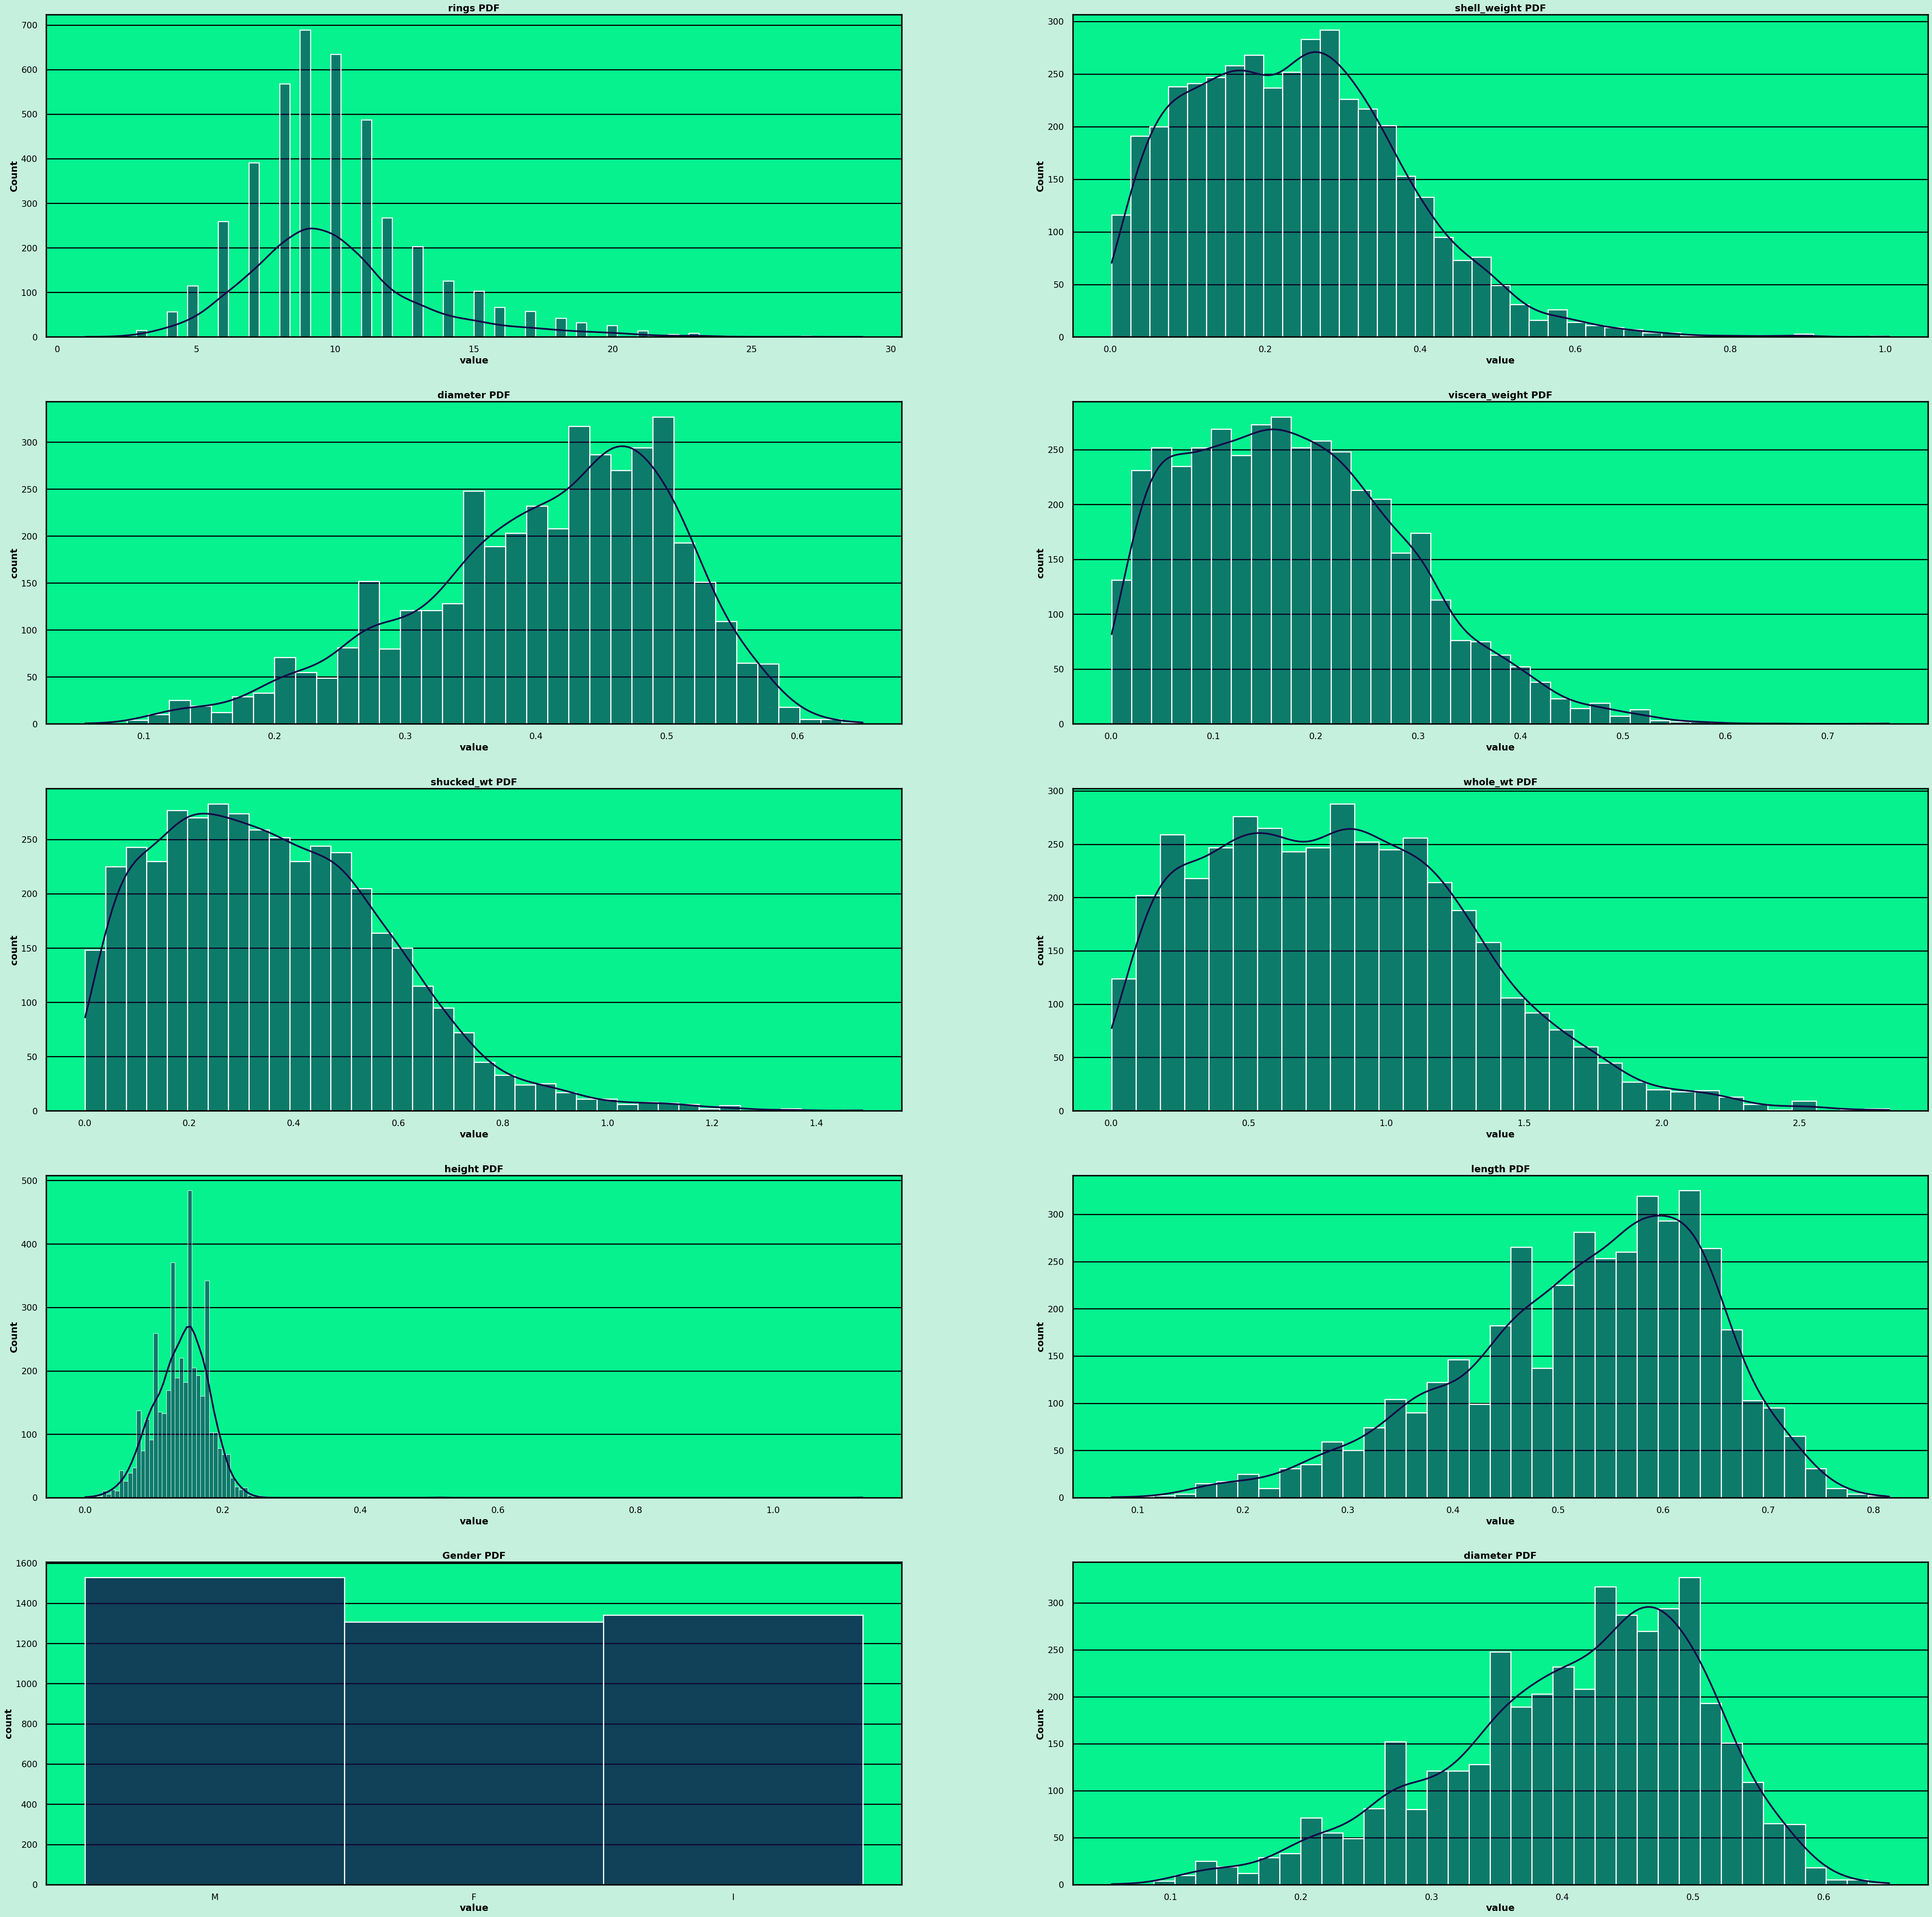

In [10]:
fig, axs = plt.subplots(5, 2, figsize=(60, 60))

sns.histplot(df["rings"], stat="count", kde=True, color=palette[-1], ax=axs[0][0])
axs[0][0].set_title("rings PDF", fontweight="bold")
axs[0][0].set_xlabel("value", fontweight="bold")
axs[0][0].set_ylabel("Count", fontweight="bold")

axs[0][0].grid(axis="x")

sns.histplot(df["shell_wt"], stat="count", kde=True, color=palette[-1], ax=axs[0][1])
axs[0][1].set_title("shell_weight PDF", fontweight="bold")
axs[0][1].set_xlabel("value", fontweight="bold")
axs[0][1].set_ylabel("Count", fontweight="bold")

axs[0][1].grid(axis="x")

sns.histplot(df["diameter"], stat="count", kde=True, color=palette[-1], ax=axs[1][0])
axs[1][0].set_title("diameter PDF", fontweight="bold")
axs[1][0].set_xlabel("value", fontweight="bold")
axs[1][0].set_ylabel("count", fontweight="bold")

axs[1][0].grid(axis="x")

sns.histplot(df["viscera_wt"], stat="count", kde=True, color=palette[-1], ax=axs[1][1])
axs[1][1].set_title("viscera_weight PDF", fontweight="bold")
axs[1][1].set_xlabel("value", fontweight="bold")
axs[1][1].set_ylabel("count", fontweight="bold")

axs[1][1].grid(axis="x")

sns.histplot(df["shucked_wt"], stat="count", kde=True, color=palette[-1], ax=axs[2][0])
axs[2][0].set_title("shucked_wt PDF", fontweight="bold")
axs[2][0].set_xlabel("value", fontweight="bold")
axs[2][0].set_ylabel("count", fontweight="bold")

axs[2][0].grid(axis="x")

sns.histplot(df["whole_wt"], stat="count", kde=True, color=palette[-1], ax=axs[2][1])
axs[2][1].set_title("whole_wt PDF", fontweight="bold")
axs[2][1].set_xlabel("value", fontweight="bold")
axs[2][1].set_ylabel("count", fontweight="bold")

axs[2][1].grid(axis="x")

sns.histplot(df["height"], stat="count", kde=True, color=palette[-1], ax=axs[3][0])
axs[3][0].set_title("height PDF", fontweight="bold")
axs[3][0].set_xlabel("value", fontweight="bold")
axs[3][0].set_ylabel("Count", fontweight="bold")

axs[3][0].grid(axis="x")

sns.histplot(df["length"], stat="count", kde=True, color=palette[-1], ax=axs[3][1])
axs[3][1].set_title("length PDF", fontweight="bold")
axs[3][1].set_xlabel("value", fontweight="bold")
axs[3][1].set_ylabel("count", fontweight="bold")

axs[3][1].grid(axis="x")

sns.histplot(df["Gender"], stat="count", color=palette[-1], ax=axs[4][0])
axs[4][0].set_title("Gender PDF", fontweight="bold")
axs[4][0].set_xlabel("value", fontweight="bold")
axs[4][0].set_ylabel("count", fontweight="bold")

axs[4][0].grid(axis="x")

sns.histplot(df["diameter"], stat="count", kde=True, color=palette[-1], ax=axs[4][1])
axs[4][1].set_title("diameter PDF", fontweight="bold")
axs[4][1].set_xlabel("value", fontweight="bold")
axs[4][1].set_ylabel("Count", fontweight="bold")

axs[4][1].grid(axis="x")

CPU times: user 41.1 s, sys: 1.79 s, total: 42.9 s
Wall time: 47 s


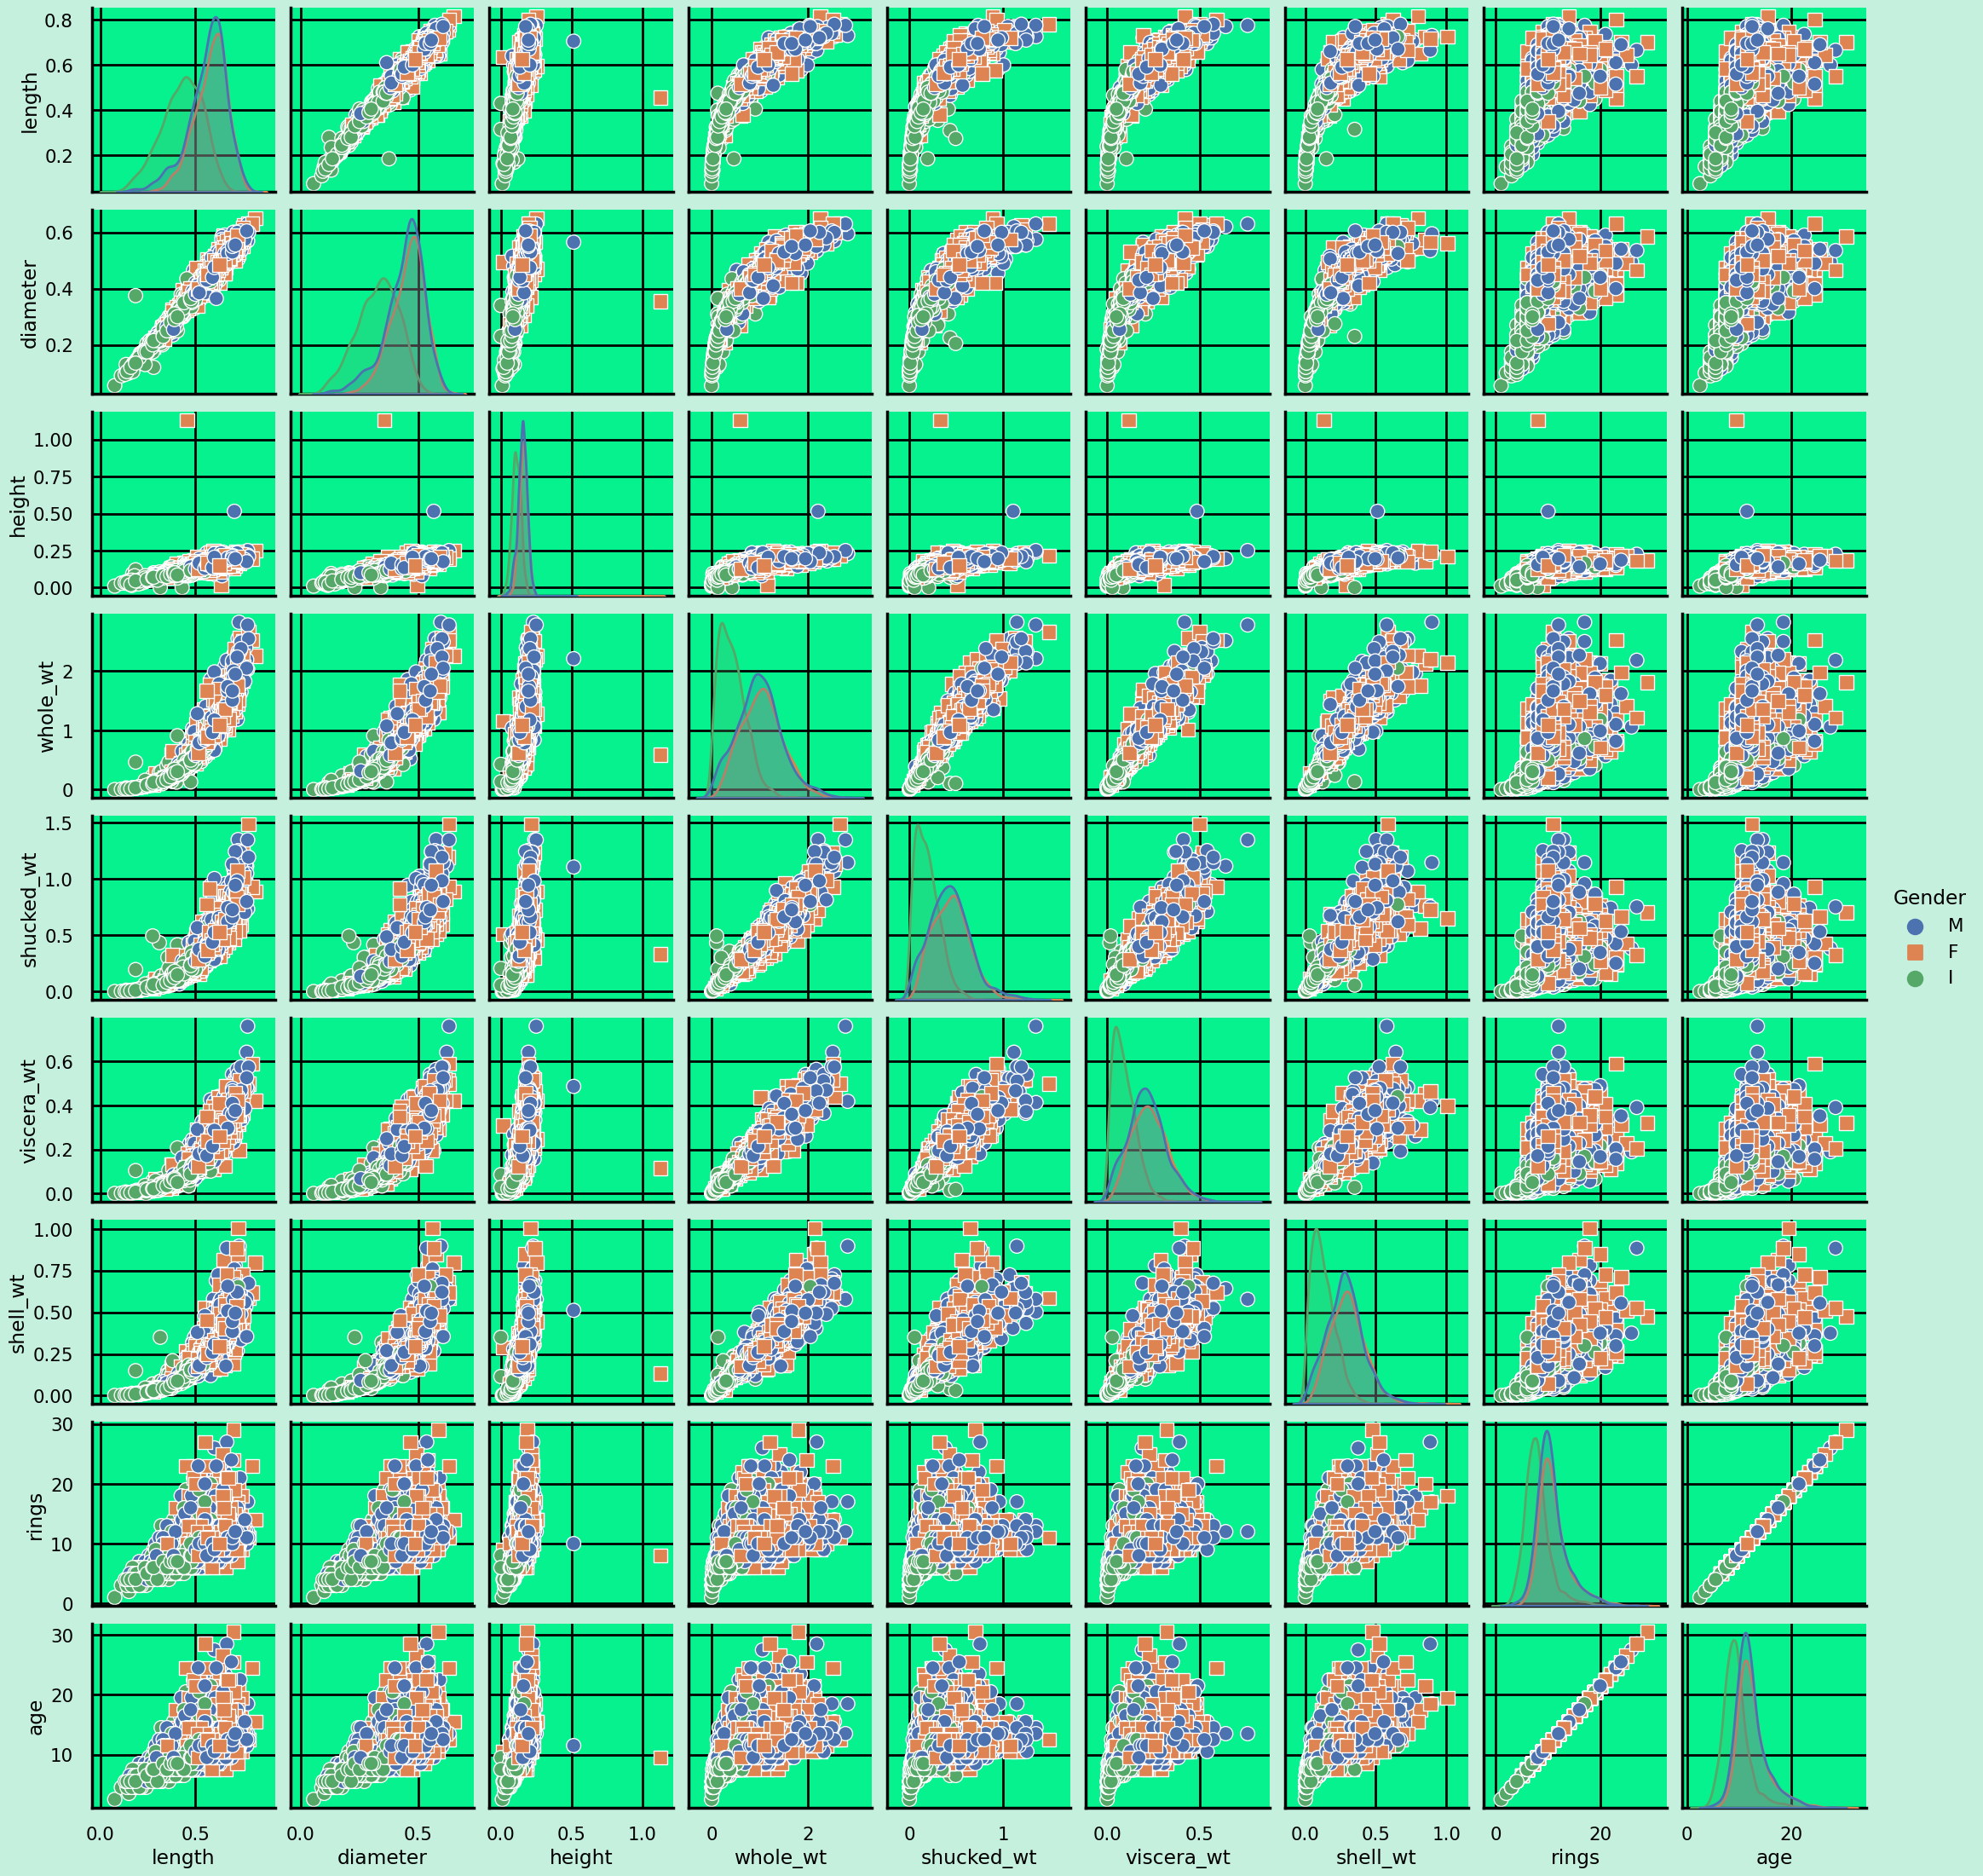

In [11]:
%%time
sns.pairplot(df, hue ="Gender", markers=["o", "s"])

<div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#023e8a;padding:20px;border-radius:10px;border:3px solid #000066;color:white">&nbsp;
👀 &nbsp;<b>Inference</b><br />
    - <i> The age of the abalone can be determined by the number of rings in the shell, and that is why rings and age highly correlated</i><br />
    - <i> but to count the number of rings, we have to cut through the cone, stain and count the  number of rings through the microscope</i><br />
    - <i> In this model, we will try to get the age of the abalone with other parameters such as gender, weight, height and other parameters</i><br /><br />
</div>

In [13]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100
pd.DataFrame(pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])).style.set_table_styles(table_styles).set_properties(**set_properties)

<Axes: >

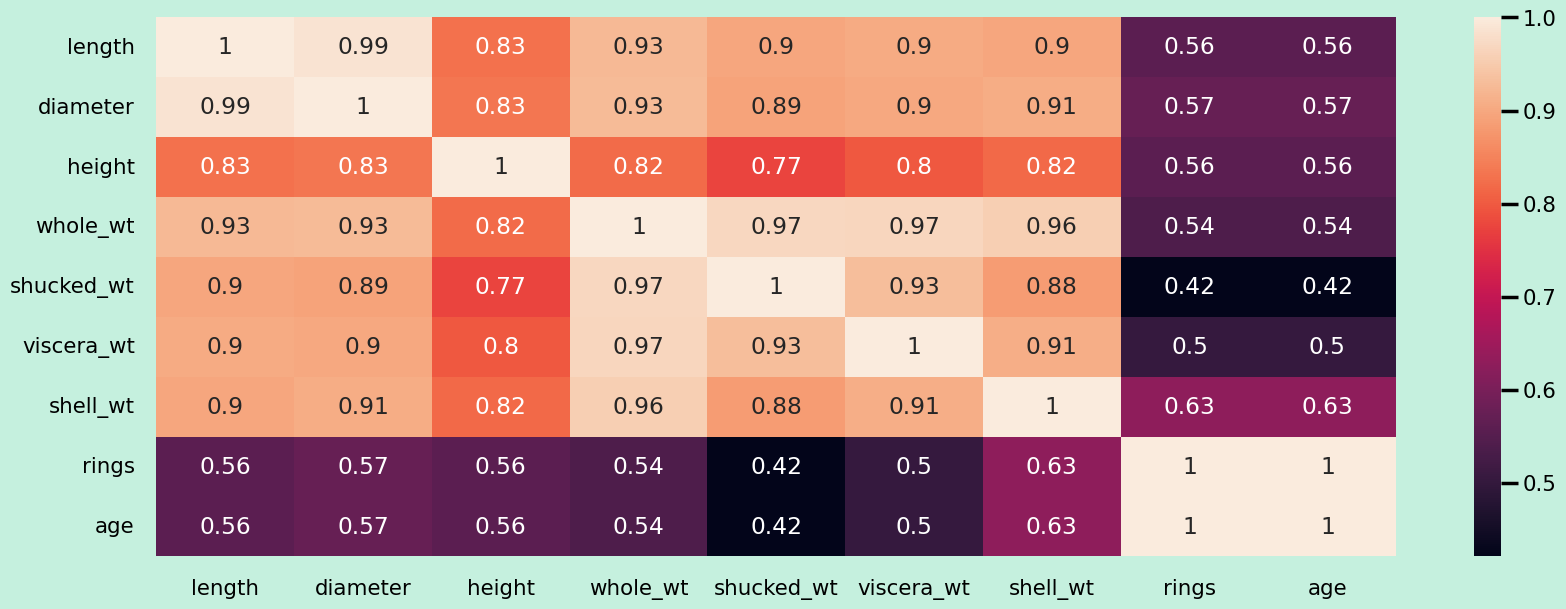

In [14]:
x_value = ['length', 'diameter', 'height', 'whole_wt', 'shucked_wt', 'viscera_wt', 'shell_wt',"rings", "age"]
plt.figure(figsize=(20,7))
sns.heatmap(df[x_value].corr(), annot=True)

In [15]:
df.columns

Index(['Gender', 'length', 'diameter', 'height', 'whole_wt', 'shucked_wt',
       'viscera_wt', 'shell_wt', 'rings', 'age'],
      dtype='object')

Outlier handling

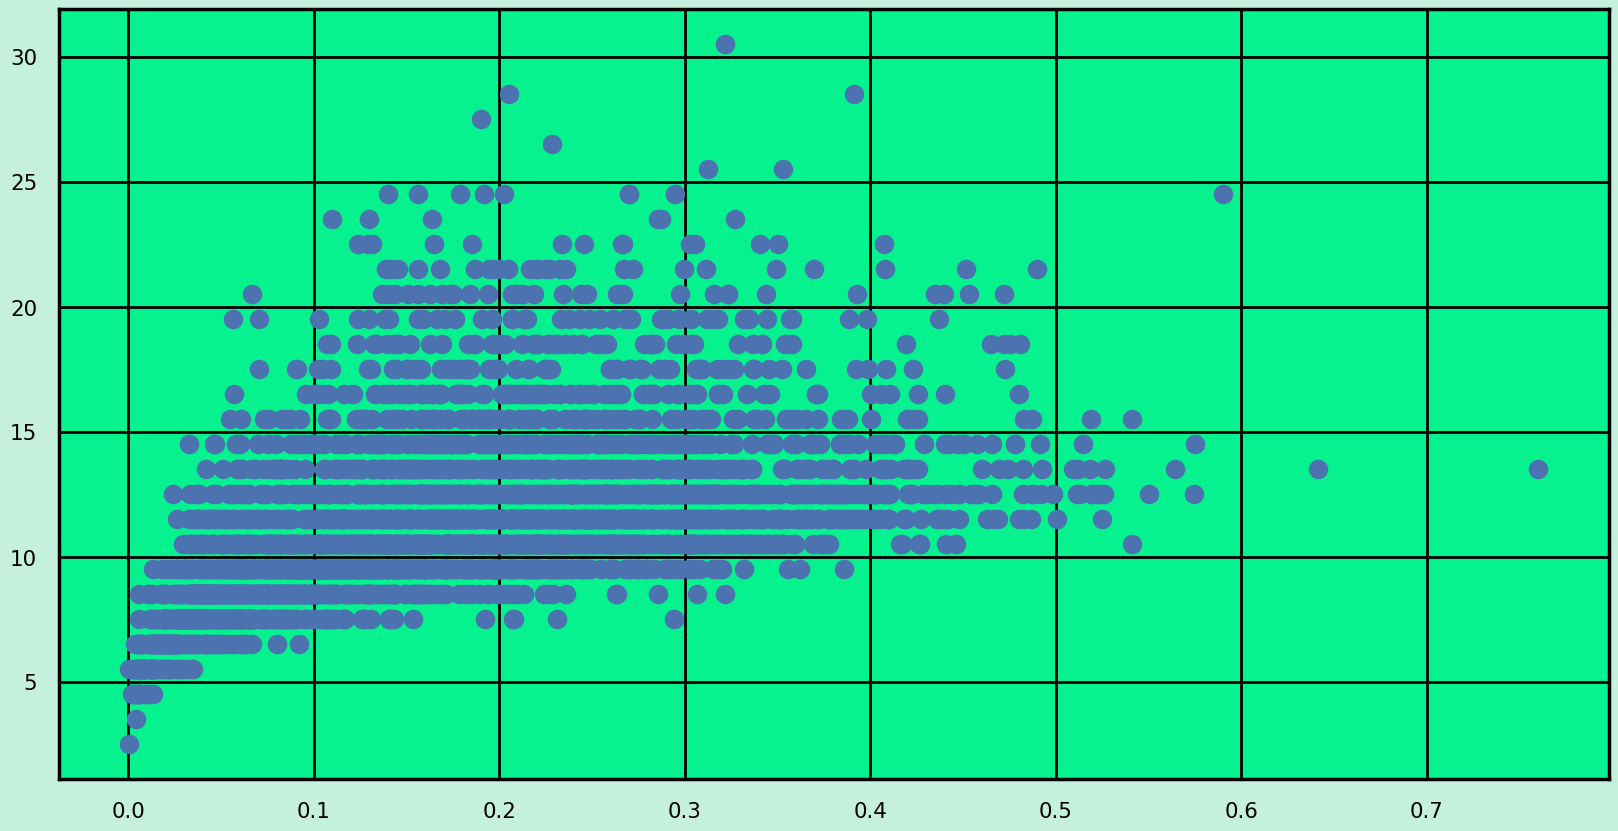

In [16]:
var = 'viscera_wt'
plt.figure(figsize=(20,10))
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)

In [17]:
# outliers removal
df.drop(df[(df['viscera_wt']> 0.5) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['viscera_wt']<0.5) & (df['age'] > 25)].index, inplace=True)

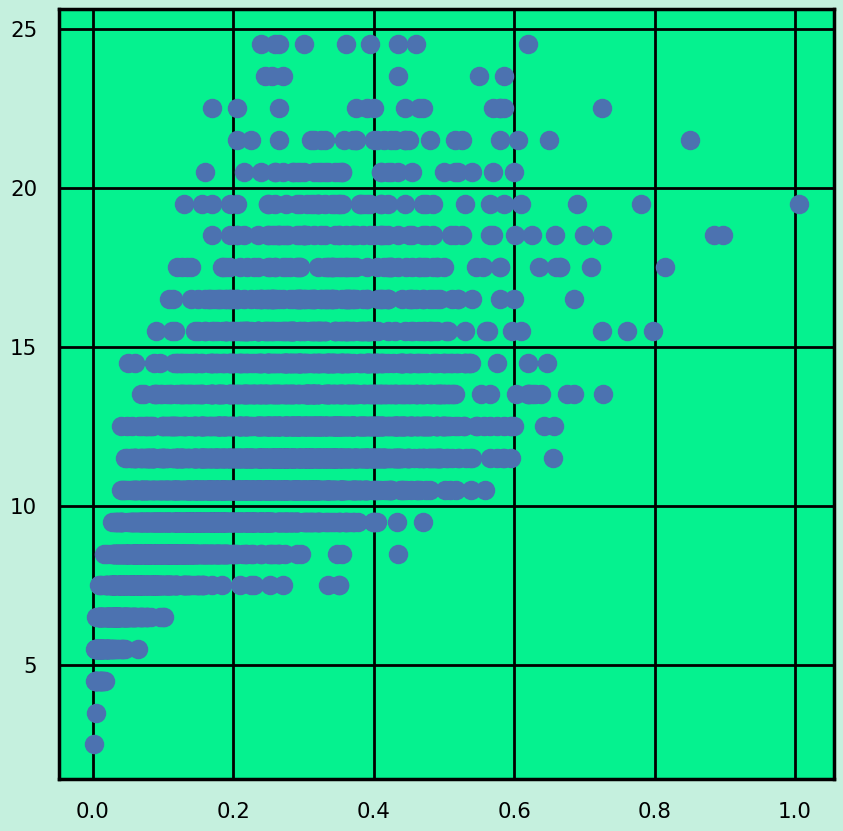

In [18]:
var = 'shell_wt'
plt.figure(figsize=(10,10))
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)

In [19]:
df.drop(df[(df['shell_wt']> 0.6) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['shell_wt']<0.8) & (df['age'] > 25)].index, inplace=True)

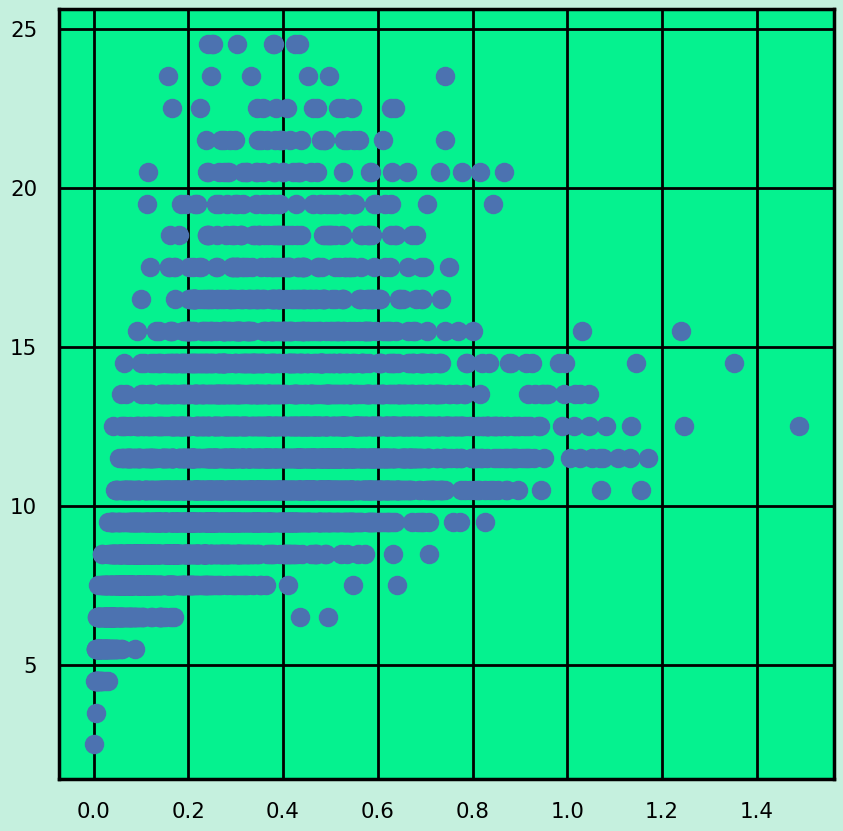

In [20]:
var = 'shucked_wt'
plt.figure(figsize=(10,10))
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)

In [21]:
df.drop(df[(df['shucked_wt']>= 1) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['shucked_wt']<1) & (df['age'] > 20)].index, inplace=True)

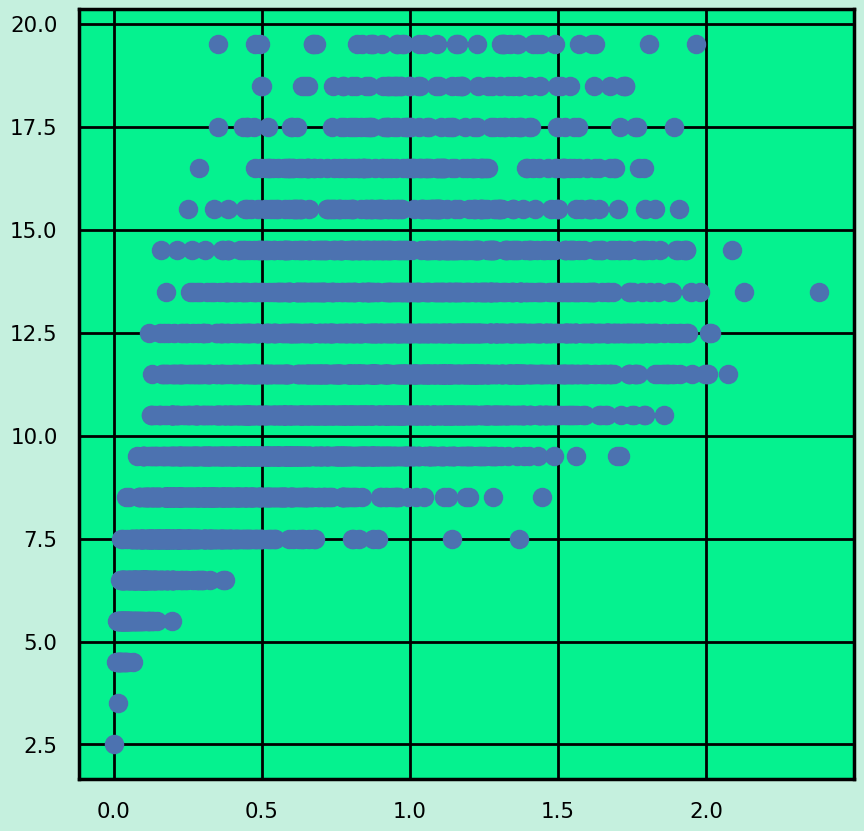

In [22]:
var = 'whole_wt'
plt.figure(figsize=(10,10))
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)

In [23]:
df.drop(df[(df['whole_wt']>= 2.5) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['whole_wt']<2.5) & (df['age'] > 25)].index, inplace=True)

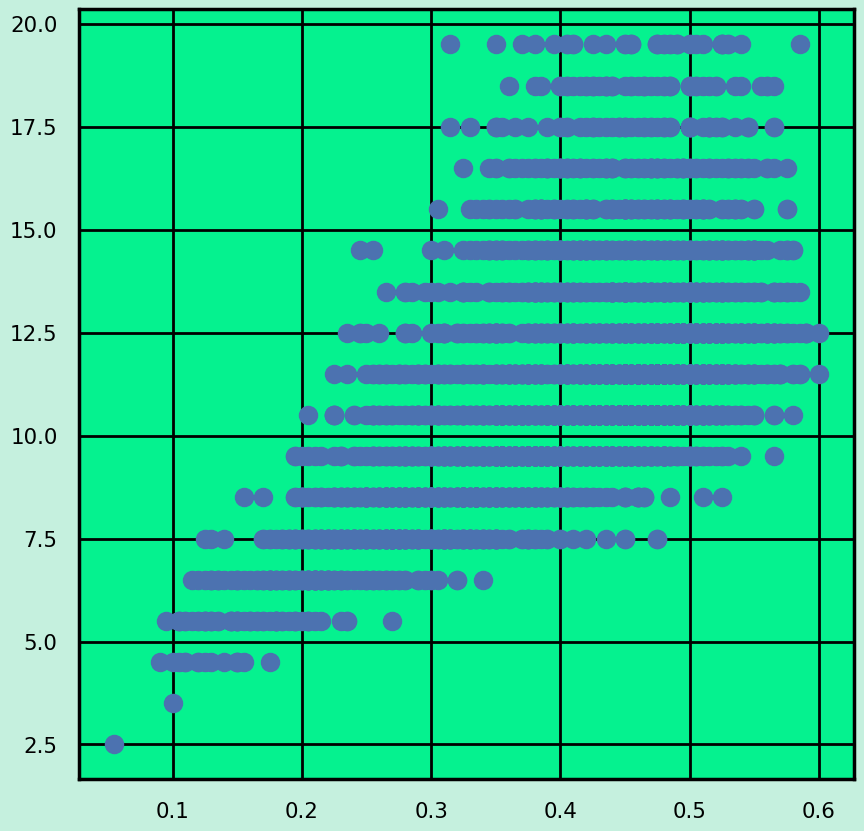

In [24]:
var = 'diameter'
plt.figure(figsize=(10,10))
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)

In [25]:
df.drop(df[(df['diameter']<0.1) & (df['age'] < 5)].index, inplace=True)
df.drop(df[(df['diameter']<0.6) & (df['age'] > 25)].index, inplace=True)
df.drop(df[(df['diameter']>=0.6) & (df['age']< 25)].index, inplace=True)

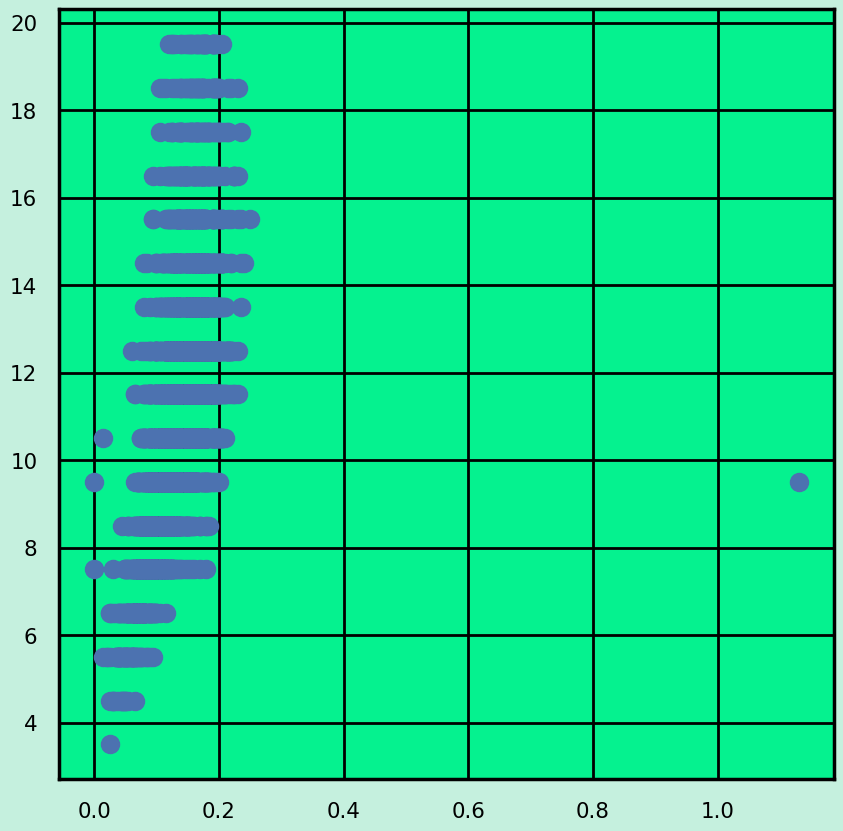

In [26]:
var = 'height'
plt.figure(figsize=(10,10))
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)

In [27]:
df.drop(df[(df['height']>0.4) & (df['age'] < 15)].index, inplace=True)
df.drop(df[(df['height']<0.4) & (df['age'] > 25)].index, inplace=True)

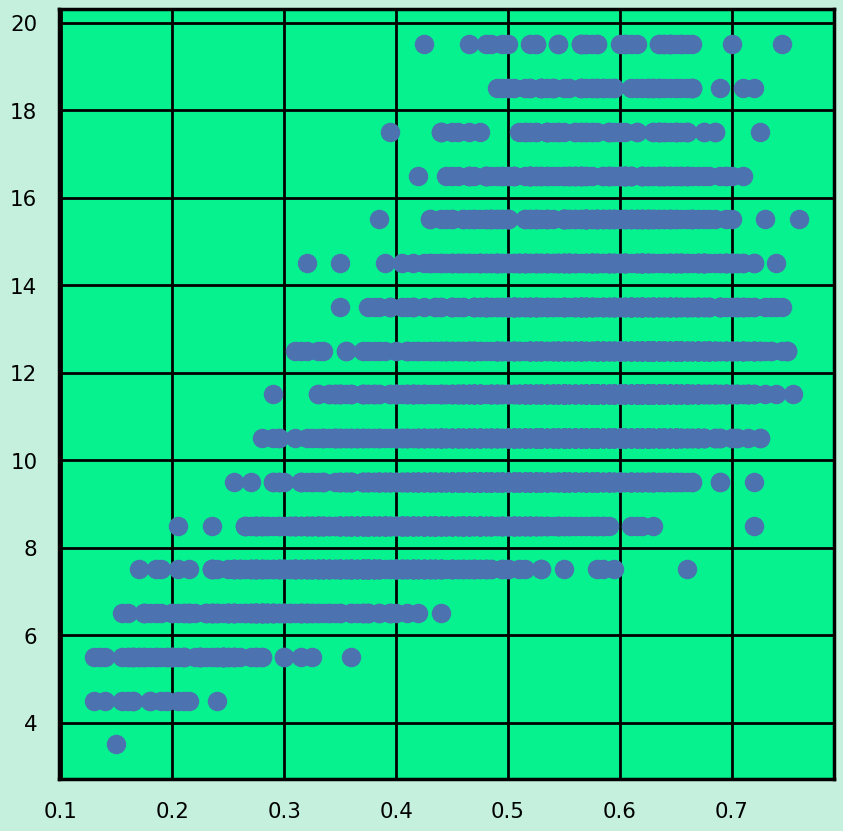

In [28]:
var = 'length'
plt.figure(figsize=(10,10))
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)

In [29]:
df.drop(df[(df['length']<0.1) & (df['age'] < 5)].index, inplace=True)
df.drop(df[(df['length']<0.8) & (df['age'] > 25)].index, inplace=True)
df.drop(df[(df['length']>=0.8) & (df['age']< 25)].index, inplace=True)

In [30]:
df = pd.get_dummies(df)
dummy_df = df.copy()

In [31]:
df

length  diameter  height  whole_wt  shucked_wt  viscera_wt  shell_wt  \
0      0.455     0.365   0.095    0.5140      0.2245      0.1010    0.1500   
1      0.350     0.265   0.090    0.2255      0.0995      0.0485    0.0700   
2      0.530     0.420   0.135    0.6770      0.2565      0.1415    0.2100   
3      0.440     0.365   0.125    0.5160      0.2155      0.1140    0.1550   
4      0.330     0.255   0.080    0.2050      0.0895      0.0395    0.0550   
...      ...       ...     ...       ...         ...         ...       ...   
4172   0.565     0.450   0.165    0.8870      0.3700      0.2390    0.2490   
4173   0.590     0.440   0.135    0.9660      0.4390      0.2145    0.2605   
4174   0.600     0.475   0.205    1.1760      0.5255      0.2875    0.3080   
4175   0.625     0.485   0.150    1.0945      0.5310      0.2610    0.2960   
4176   0.710     0.555   0.195    1.9485      0.9455      0.3765    0.4950   

      rings   age  Gender_F  Gender_I  Gender_M  
0        15  16.5         0         0         1  
1         7   8.5         0         0         1  
2         9  10.5         1         0         0  
3        10  11.5         0         0         1  
4         7   8.5         0         1         0  
...     ...   ...       ...       ...       ...  
4172     11  12.5         1         0         0  
4173     10  11.5         0         0         1  
4174      9  10.5         0         0         1  
4175     10  11.5         1         0         0  
4176     12  13.5         0         0         1  

[3995 rows x 12 columns]

<div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#023e8a;padding:20px;border-radius:10px;border:3px solid #000066;color:white">&nbsp;
<h3>Preprocessing, Modeling, Evaluation</h3>
<p>The base steps followed in any data modeling pipelines are:
           - <i>pre-processing </br>
           - suitable model selection</br>
           - modeling</br>
           - hyperparamaters tunning using GridSearchCV</br>
           - evaluation</i></p>
</div>

In [32]:
X = df.drop(['age','rings'], axis = 1)
y = df['age']

In [33]:
X.columns

Index(['length', 'diameter', 'height', 'whole_wt', 'shucked_wt', 'viscera_wt',
       'shell_wt', 'Gender_F', 'Gender_I', 'Gender_M'],
      dtype='object')

In [34]:
standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest(k=10)
X_new = selectkBest.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)

In [35]:
np.random.seed(10)
def rmse_cv(model, X_train, y):
    rmse =- (cross_val_score(model, X_train, y, scoring='neg_mean_squared_error', cv=5))
    return(rmse*100)

models = [LinearRegression(),
             GradientBoostingRegressor(),]

names = ['LR','GB']

for model,name in zip(models,names):
    score = rmse_cv(model,X_train,y_train)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 361.505777, 15.926827
GB    : 342.212838, 14.529176


In [36]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['age'])

    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

    #Perform cross-validation:
    if performCV:
        cv_score = -cross_val_score(alg, dtrain[predictors], dtrain['age'], cv=cv_folds,
                                                    scoring='r2')

    #Print model report:
    print ("\nModel Report")
    print( "RMSE : %.4g" % mean_squared_error(dtrain['age'].values, dtrain_predictions))
    print( "R2 Score (Train): %f" % r2_score(dtrain['age'], dtrain_predictions))

    if performCV:
        print( "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),
                                                                                 np.min(cv_score),np.max(cv_score)))

    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.coef_, predictors).sort_values(ascending=False)
        plt.figure(figsize=(20,4))
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
RMSE : 3.593
R2 Score (Train): 0.529894
CV Score : Mean - -0.4503433 | Std - 0.08079434 | Min - -0.514565 | Max - -0.3061263


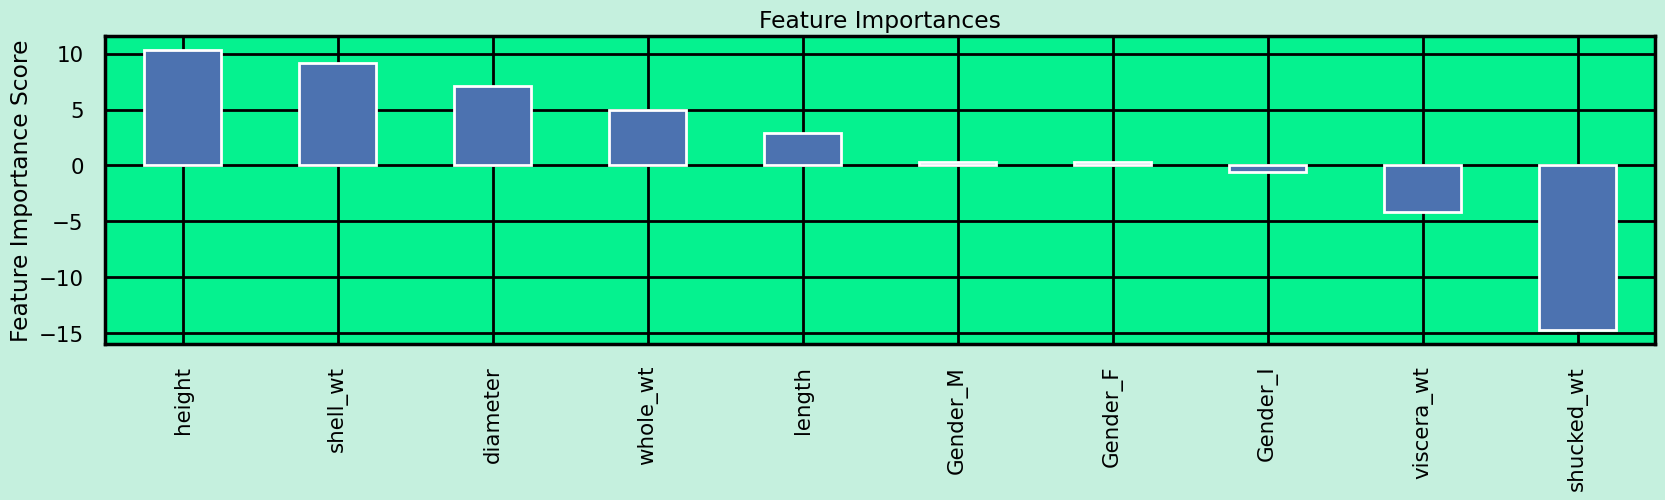

In [37]:
# Base Model
predictors = [x for x in df.columns if x not in ['age', 'Gender', 'rings']]
lrm0 = Ridge(random_state=10)
modelfit(lrm0, df, predictors)

In [38]:
from sklearn.model_selection import  GridSearchCV
param  = {'alpha':[0.01, 0.1, 1,10,100],
         'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
glrm0 = GridSearchCV(estimator = Ridge(random_state=10,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
glrm0.fit(X_train, y_train)
glrm0.best_params_, glrm0.best_score_

({'alpha': 0.01, 'solver': 'lsqr'}, 0.5343849884532748)


Model Report
RMSE : 3.558
R2 Score (Train): 0.534426
CV Score : Mean - -0.4543985 | Std - 0.08665801 | Min - -0.5172686 | Max - -0.2913273


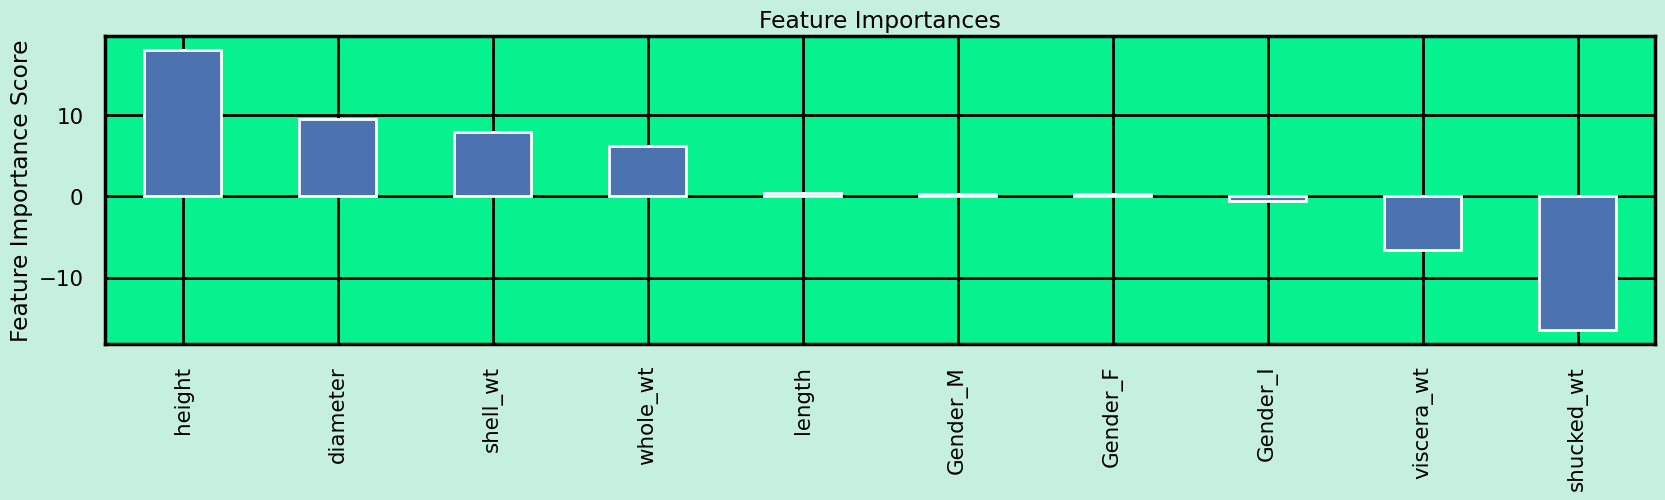

In [39]:
modelfit(Ridge(alpha = 0.1,random_state=10,), df, predictors)

classifiers

In [40]:
age=tuple(df['age'].value_counts().index)
age_counts = tuple(df['age'].value_counts())
age_data = {'age' : age, 'count': age_counts}
df_age = pd.DataFrame(age_data)
df_age.style.set_table_styles(table_styles).set_properties(**set_properties).format(precision =1)

In [41]:
df['age'].mean()

11.127284105131414

In [42]:
df_1 = df.copy()

In [43]:
Age = []
for i in df_1['age']:
    if i > 11.12:
        Age.append('1')
    else:
        Age.append('0')
df_1['Age'] = Age
df_1.drop('age', axis = 1, inplace = True)
df_1.head().style.set_table_styles(table_styles).set_properties(**set_properties)

In [44]:
df_1['Age'].value_counts()

0    2090
1    1905
Name: Age, dtype: int64

In [45]:
X1 = df_1.drop(['Age', 'rings'], axis = 1).values
y1 = df_1['Age'].values

In [46]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 123)

In [47]:
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [48]:
lr = LogisticRegression()
lr.fit(X1_train, y1_train)
y1_pred = lr.predict(X1_test)

print('Classification Report: \n', classification_report(y1_test, y1_pred))
print('Confusion Matrix: \n', confusion_matrix(y1_test, y1_pred))
lr_train_acc = lr.score(X1_train, y1_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X1_test, y1_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       611
           1       0.78      0.73      0.76       588

    accuracy                           0.77      1199
   macro avg       0.77      0.77      0.77      1199
weighted avg       0.77      0.77      0.77      1199

Confusion Matrix: 
 [[489 122]
 [157 431]]
Training Score:  0.7832618025751072
Testing Score:  0.7673060884070059
